# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [41]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

In [44]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


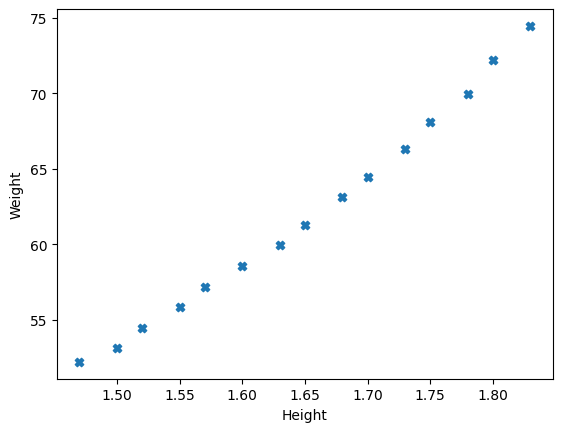

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [46]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [47]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.weights=None
        ######################
        #   YOUR CODE HERE   #
        ######################

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
         # Add bias term to X
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # Initialize weights
        self.weights = np.zeros(X.shape[1])

        # Gradient descent
        for _ in range(self.epochs):
            self.update_weights(X, y)
        ######################
        #   YOUR CODE HERE   #
        ######################



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        # Number of samples
        m = X.shape[0]

        # Predictions
        predictions = X.dot(self.weights)

        # Calculate the error
        error = predictions - y

        # Calculate the gradient
        gradient = (1/m) * X.T.dot(error)

        # Update the weights
        self.weights -= self.lr * gradient
        ######################
        #   YOUR CODE HERE   #
        ######################



    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        # Add bias term to X
        X = np.c_[np.ones((X.shape[0], 1)), X]

        # Return predictions
        return X.dot(self.weights)
        ######################
        #   YOUR CODE HERE   #
        ######################



### Build the model and train on the dataset.

In [48]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [49]:
def mean_squared_error(y_pred, y_actual):


    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """

    return  np.mean((y_pred - y_actual) ** 2)
     ######################
     #   YOUR CODE HERE   #
     ######################



### Make predictions using the model and evaluate it.

In [50]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5197


### Plot the predicted and the actual values.

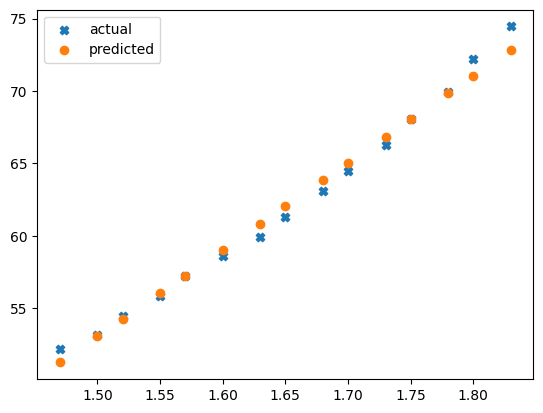

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [52]:
df = pd.read_csv('/content/drive/MyDrive/Copy of advertise.csv')

In [53]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [54]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [55]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [56]:
######################
#   YOUR CODE HERE   #
######################
# Normalize the features
minmax = dataset_minmax(X)
X_normalized = normalize_dataset(X, minmax)

# Initialize and train the model
model = LinearRegression(lr=0.01, epochs=100000)
model.train(X_normalized, y)

# Make predictions
y_pred = model.predict(X_normalized)

# Evaluate the model
mse = mean_squared_error(y_pred, y)
print("Train MSE: {:.4f}".format(mse))


Train MSE: 2.7060


### Split the data into train and test set.

In [57]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [58]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [59]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [60]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [61]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Using Closed Form Solution(75)


* For both the above 2 models you need to try out the closed form solutions
* The more efforts you put in, the more marks you get.
* It is open ended

In [62]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

# Extract features and target variable
X = df.drop(columns=['Height']).values
y = df['Height'].values

# Functions for normalization
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    normalized = np.copy(dataset)
    for row in normalized:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return normalized

def unnormalize_dataset(dataset, minmax):
    unnormalized = np.copy(dataset)
    for row in unnormalized:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return unnormalized

# Normalize the features
minmax = dataset_minmax(X)
X_normalized = normalize_dataset(X, minmax)

# Add bias term to X
X_normalized = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Closed form solution
def closed_form_solution(X, y):
    # Calculate weights using the normal equation
    X_T_X = np.dot(X.T, X)
    X_T_y = np.dot(X.T, y)
    weights = np.dot(np.linalg.inv(X_T_X), X_T_y)
    return weights

# Calculate weights using closed form solution
weights = closed_form_solution(X_normalized, y)

# Predict function
def predict(X, weights):
    return np.dot(X, weights)

# Make predictions
y_pred = predict(X_normalized, weights)

# Mean squared error function
def mean_squared_error(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

# Evaluate the model
mse = mean_squared_error(y_pred, y)
print("Train MSE: {:.4f}".format(mse))


Train MSE: 0.0001


In [63]:
###########################
### Write your code here###
###########################
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of advertise.csv')

# Extract features and target variable
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

# Functions for normalization
def dataset_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    normalized = np.copy(dataset)
    for row in normalized:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return normalized

def unnormalize_dataset(dataset, minmax):
    unnormalized = np.copy(dataset)
    for row in unnormalized:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return unnormalized

# Normalize the features
minmax = dataset_minmax(X)
X_normalized = normalize_dataset(X, minmax)

# Add bias term to X
X_normalized = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Closed form solution
def closed_form_solution(X, y):
    # Calculate weights using the normal equation
    X_T_X = np.dot(X.T, X)
    X_T_y = np.dot(X.T, y)
    weights = np.dot(np.linalg.inv(X_T_X), X_T_y)
    return weights

# Calculate weights using closed form solution
weights = closed_form_solution(X_normalized, y)

# Predict function
def predict(X, weights):
    return np.dot(X, weights)

# Make predictions
y_pred = predict(X_normalized, weights)

# Mean squared error function
def mean_squared_error(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

# Evaluate the model
mse = mean_squared_error(y_pred, y)
print("Train MSE: {:.4f}".format(mse))


Train MSE: 2.7060


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [65]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [66]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        ######################
        #   YOUR CODE HERE   #
        ######################
        # You may add additional fields

    def sigmoid(self, z):
        """
        Sigmoid function.

        Args:
            z: input value or array

        Returns:
            Sigmoid of input
        """
        return 1 / (1 + np.exp(-z))


    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X
        self.weights = np.zeros(X.shape[1])  # Initialize weights

        for _ in range(self.epochs):
            self.update_weights(X, y)



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error)
        self.weights -= self.lr * gradient



    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        ######################
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X
        return self.sigmoid(np.dot(X, self.weights))


### Build the model and train on the dataset.

In [67]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [68]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    return np.mean(y_pred == y_actual)


### Make predictions using the model and evaluate it.

In [69]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

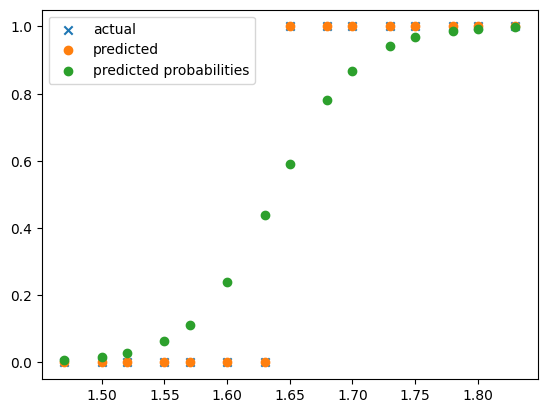

In [70]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# ** Use the Newton Raphson Method for the same** (75 marks)


In [71]:
#####################
#   YOUR CODE HERE   #
######################
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of heights.csv')

# Prepare the features and target variable
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)  # Ensure X_train is a 2D array

In [72]:
class LogisticRegressionNewtonRaphson:
    def __init__(self, epochs=30, regularization_strength=1.0):
        """
        Fits a logistic regression model on a given dataset using the Newton-Raphson method.

        Args:
            epochs: number of iterations over the dataset
            regularization_strength: strength of the L2 regularization term
        """
        self.epochs = epochs
        self.regularization_strength = regularization_strength
        self.weights = None

    def sigmoid(self, z):
        """
        Sigmoid function.

        Args:
            z: input value or array

        Returns:
            Sigmoid of input
        """
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights using the Newton-Raphson method.

        Args:
            X: features
            y: target
        """
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X
        self.weights = np.zeros(X.shape[1])  # Initialize weights

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using the Newton-Raphson method.

        Args:
            X: features
            y: target
        """
        m = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights))
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error)

        # Create the diagonal matrix R
        R = np.diag(predictions * (1 - predictions))

        # Calculate the Hessian matrix with regularization
        H = (1/m) * np.dot(np.dot(X.T, R), X) + self.regularization_strength * np.eye(X.shape[1])

        # Update weights
        H_inv = np.linalg.inv(H)
        self.weights -= np.dot(H_inv, gradient)

    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term to X
        return self.sigmoid(np.dot(X, self.weights))

In [73]:
#####################
#   YOUR CODE HERE   #
######################
model = LogisticRegressionNewtonRaphson(epochs=100, regularization_strength=1.0)
model.train(X_train, y_train)

# Make predictions
y_pred_prob = model.predict(X_train)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluation metric: accuracy
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    return np.mean(y_pred == y_actual)

# Evaluate the model
acc = accuracy(y_pred, y_train)
print("Train Accuracy: {:.4f}".format(acc))

Train Accuracy: 0.6000


# K Means Clustering(100 marks)



In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



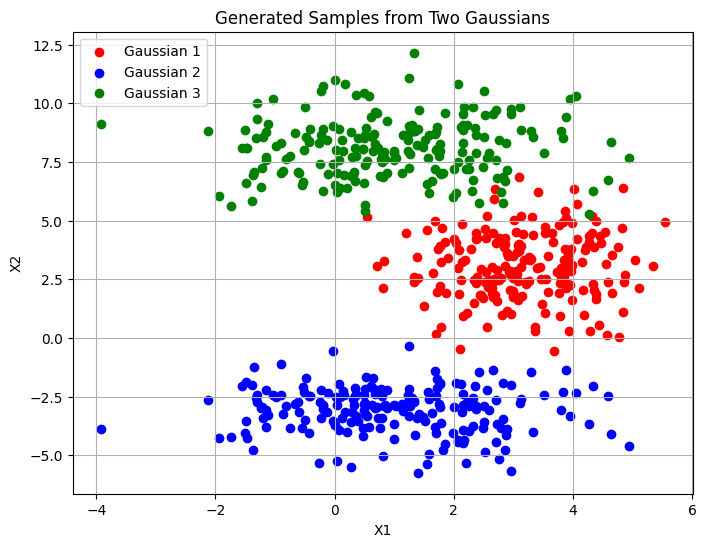

In [75]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples2[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

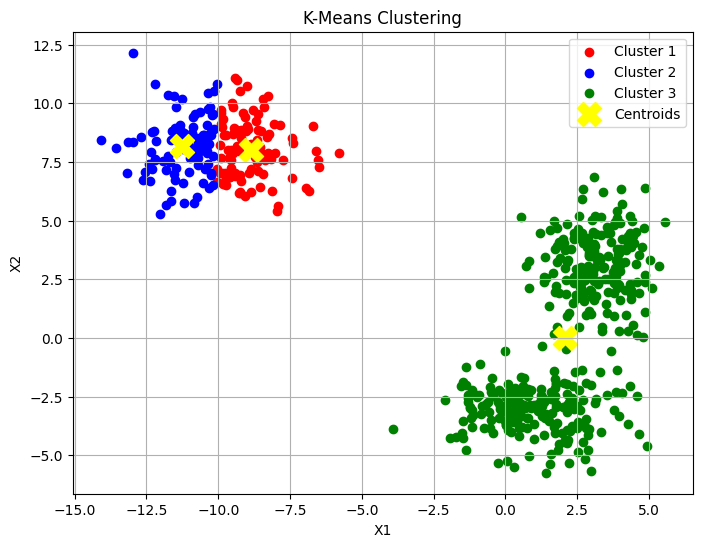

In [76]:
#####################
#   YOUR CODE HERE   #
#####################

# Combine samples into a single dataset
data = np.vstack((samples1, samples2, samples3))

# Implement the K-Means algorithm
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.k, replace=False)]

        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X)
            new_centroids = self.calculate_centroids(X)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def assign_clusters(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

    def calculate_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

    def predict(self, X):
        return self.assign_clusters(X)

# Instantiate and fit the KMeans model
kmeans = KMeans(k=3)
kmeans.fit(data)

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(data[kmeans.labels == i, 0], data[kmeans.labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='yellow', marker='X', label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()
